# Plot General/Specific results

## Functions

In [9]:
%run -i 'arena.py'

In [71]:
%matplotlib inline
%matplotlib notebook
import matplotlib
from matplotlib import pyplot as plt

def plotDataFromFile(file, saveDir, style, label, color, fullRuns, linewidth, ax):
    x = [i for i in range(9)]
    if fullRuns:
        data = load_obj(saveDir, file)
        data = convertFullToMeanError(data)
        accuracy = data[:,0]
        error = data[:,1]
        print('accuracy', accuracy)
        print('error', error)
        ax.errorbar(x[:len(data)], accuracy, error, fmt='none', capsize = 4, color = color)
        ax.plot(x[:len(data)], accuracy, style, label = label, color = color, linewidth = linewidth)
    else:    
        data  = load_obj(saveDir,file)
        ax.plot(x[:len(data)],data, style, label = label, color = color, linewidth = linewidth)

def plotIt(stuffToPlot):
    ######### plot results
    for file, saveDir, style, label, color, fullRuns in stuffToPlot:
        plotDataFromFile(file, saveDir, style, label, color, fullRuns, linewidth, ax)
        
    ######## setup
    yl = ax.get_ylim()
    if ymin != None:
        yl = (ymin,yl[1])
    if ymax != None:
        yl = (yl[0],ymax)
    ax.set_ylim(yl[0], yl[1])
    
    xl = ax.get_xlim()
    ax.set_xlim(xmin, xl[1])
    
    ax.set_xlabel("Number of transferred layers")
    ax.set_ylabel("Test Accuracy")
    
    ax.legend()
    
    plt.minorticks_on()
    ax.grid(b=True, which='major', color='0.5', linestyle='-')
    ax.grid(b=True, which='minor', color='0.9', linestyle='-')

    # set fontsize
    matplotlib.rc('font', size=fontSize)
    matplotlib.rc('axes', titlesize=fontSize)
    
   
def plotCompare(yVal, error = None, label = 'noLabel', style = '-', color = '#000000', linewidth = 1):
    x = list(range(9))
    y = [yVal for i in range(9)]
    ax.plot(x, y, style, label = label, color = color, linewidth = linewidth)
    if error != None:
        ax.errorbar(x, y, error, fmt='none', capsize = 4, color = color)
        
    ######## setup
    yl = ax.get_ylim()
    if ymin != None:
        yl = (ymin,yl[1])
    if ymax != None:
        yl = (yl[0],ymax)
    ax.set_ylim(yl[0], yl[1])
    ax.set_xlim(xmin, xmax)
    ax.set_xlabel("Number of transferred layers")
    ax.set_ylabel("Test Accuracy")
    ax.legend()
    plt.minorticks_on()
    ax.grid(b=True, which='major', color='0.5', linestyle='-')
    ax.grid(b=True, which='minor', color='0.9', linestyle='-')

    # set fontsize
    matplotlib.rc('font', size=fontSize)
    matplotlib.rc('axes', titlesize=fontSize)
    
from tensorboard.backend.event_processing import event_accumulator
import numpy as np

#load Tensorboard log file from path
def loadTensorboardLog(path):
  event_acc = event_accumulator.EventAccumulator(path)
  event_acc.Reload()
  data = {}

  for tag in sorted(event_acc.Tags()["scalars"]):
    x, y = [], []

    for scalar_event in event_acc.Scalars(tag):
      x.append(scalar_event.step)
      y.append(scalar_event.value)

    data[tag] = (np.asarray(x), np.asarray(y))
  return data

#plot Tensorboard logfile
def plotTensorboardLog(file, whatToPlot = 'acc', label = 'noLabel', style = '-', color = '#000000', linewidth = 1):
    data = loadTensorboardLog(file)
    x = data[whatToPlot][0]
    y = data[whatToPlot][1]
    
    
    # wrong values
    if whatToPlot == 'val_loss':
        value = 0.0065
        for i in range(0,150):
            y[i + 100] -= i/150 * value
    ax.plot(x,y, style, label = label, color = color, linewidth = linewidth)
    
    ######## setup
    yl = ax.get_ylim()
    if ymin != None:
        yl = (ymin,yl[1])
    if ymax != None:
        yl = (yl[0],ymax)
    ax.set_ylim(yl[0], yl[1])
    ax.set_xlim(xmin, xmax)
    ax.set_xlabel("Epochs")
    if whatToPlot == 'acc' or whatToPlot == 'val_acc':
        ax.set_ylabel("Accuracy")
    else:
        ax.set_ylabel("Loss")
    ax.legend()
    plt.minorticks_on()
    ax.grid(b=True, which='major', color='0.5', linestyle='-')
    ax.grid(b=True, which='minor', color='0.9', linestyle='-')

    # set fontsize
    matplotlib.rc('font', size=fontSize)
    matplotlib.rc('axes', titlesize=fontSize)

## Parameters

In [21]:
############################### parameters
saveDir = 'bengioResults'

######## Misc parm
xSize = 7
ySize = 7
fontSize = 12
linewidth = 1
startAt = 1

######### colors
### blue red colors
c3n4p      = '#ff9999'
c3n4       = '#ff0000'
c4n4p      = '#9999ff'
c4n4       = '#0000ff'

c3n4pref   = '#ff9999'
c3n4ref    = '#ff0000'
c4n4pref   = '#9999ff'
c4n4ref    = '#0000ff'

c4scrConv  = '#ff00ff'
c4_10Epoch = '#00ffff'

### bnw colors
# c3n4p = '#000000'
# c3n4 = '#555555'
# c4n4p = '#000000'
# c4n4 = '#555555'
# c3n4pref = '#000000'
# c3n4ref = '#555555'
# c4n4pref = '#000000'
# c4n4ref = '#555555'

### new colors
# c3n4p = '#ff0000'
# c3n4 = '#00ff00'
# c4n4p = '#0000ff'
# c4n4 = '#00ffff'
# c3n4pref = '#ff5555'
# c3n4ref = '#55ff55'
# c4n4pref = '#5555ff'
# c4n4ref = '#55ffff'

########### scale
ymin = 0.95
ymax = 1.0
xmin = 1 
xmax = 8
######### limits
#outdated from tensorboard logs
# acc107net = 0.985 # from results log
acc107net = 0.9883 # based on what I want
acc4_10ep = 0.9635 #from adam adadelta measurements
# acc4_10ep = 0.9686875 #from 730-861 something ( in logs dir)
acc4_10ep_delta = 0.00144976066990384120 #from 730-861 something ( in logs dir)





# Plot Tensorboard logs

<IPython.core.display.Javascript object>


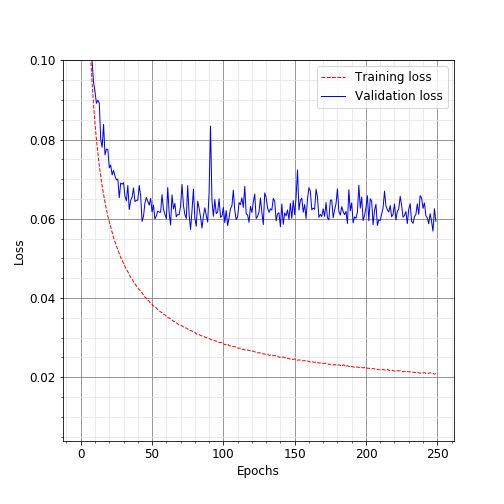

In [70]:
    
### prepare plot (has to be in same cell as the plot functions)
fig = plt.figure(figsize=(xSize,ySize))
ax = fig.add_subplot(111)
### parameters
ymin = None
ymax = None
xmin = None
xmax = None

# ymin = 0.95
ymax = 0.1
# xmin = 1 
# xmax = 8

file = "./logsArchiveGood/052-4pc-RND-184KPM-Training 4pc with transfer from 3pc, on 7 CNN layers/events.out.tfevents.1548120196.polaris"
plotTensorboardLog(file, whatToPlot='loss', label = 'Training loss', style = '--', color = '#ff0000')
plotTensorboardLog(file, whatToPlot='val_loss', label = 'Validation loss', style = '-', color = '#0000ff')



## Run arrays

In [22]:
######### Plot plots using plot function plot
run001 = [
               #3n4+
               ['3n4+-10runAverage', 'bengioResults/1.savedResults/001', '-', '3n4+ 001', c3n4p, False],
               #3n4
               ['3n4-10runAverage',  'bengioResults/1.savedResults/001', '-', '3n4 001',  c3n4,  False],
               #4n4+
               ['4n4+-10runAverage', 'bengioResults/1.savedResults/001', '-', '4n4+ 001', c4n4p, False],
               #4n4
               ['4n4-10runAverage' , 'bengioResults/1.savedResults/001', '-', '4n4 001',  c4n4,  False]
                ]


run002 = [
               #3n4+
#                ['3n4+', 'bengioResults/1.savedResults/002', '-.', '3n4+ 002', c3n4p, True]
               #3n4
#                ['3n4',  'bengioResults/1.savedResults/002', '-.', '3n4 002',  c3n4,  False]
               #4n4+
#                ['4n4+allRuns', 'bengioResults/1.savedResults/002', '-.', '4n4+ 002', c4n4p, True]
               #4n4
               ['4n4allRuns' , 'bengioResults/1.savedResults/002', '-.', '4n4 002',  c4n4,  True]
              ]

run003 = [
               #3n4+
               ['3n4+', 'bengioResults/1.savedResults/003', '--', '3n4+ 003', c3n4p, False]
                ,
               #3n4
               ['3n4',  'bengioResults/1.savedResults/003', '--', '3n4 003',  c3n4,  False]
                ,
               #4n4+
               ['4n4+', 'bengioResults/1.savedResults/003', '--', '4n4+ 003', c4n4p, False]
                ,
               #4n4
               ['4n4' , 'bengioResults/1.savedResults/003', '--', '4n4 003',  c4n4,  False]
              ]

run005 = [
               #3n4+
               ['3n4+', 'bengioResults/1.savedResults/005', '--', '3n4+', c4n4, True]
#                 ,
               #3n4
#                ['3n4',  'bengioResults/1.savedResults/005', '-', '3n4',  c4n4,  True]
              ]

run006 = [
               #4n4+
#                ['4n4p', 'bengioResults/1.savedResults/006', '--', '4n4+ 005', c4n4p, True],
               ['4n4p-allRuns',  'bengioResults', '--', '4n4+',  c4n4,  True]
                ,
               #4n4
#                ['4n4',  'bengioResults/1.savedResults/006', '--', '4n4 006',  c4n4,  True]
               ['4n4-allRuns',  'bengioResults', '-', '4n4',  c4n4,  True]
              ]

## Draw Plots

<IPython.core.display.Javascript object>


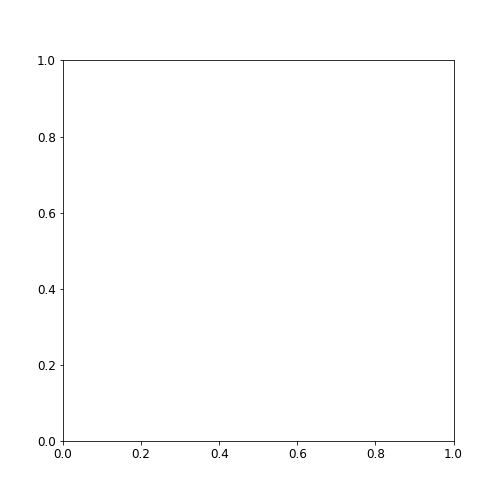

In [23]:
### prepare plot (has to be in same cell as the plot functions)
fig = plt.figure(figsize=(xSize,ySize))
ax = fig.add_subplot(111)

### plot plots
# ruined
# plotIt(run001)

# ruined
# plotIt(run002)

# one run average for comp with 001 and 002
# plotIt(run003)

<IPython.core.display.Javascript object>


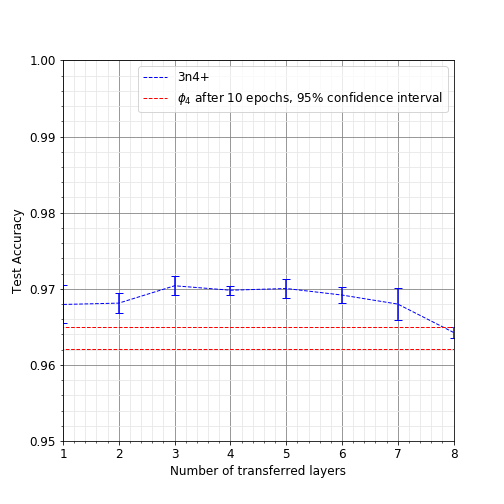

accuracy [0.9658536  0.96794267 0.96811627 0.97039777 0.96981283 0.97003851
 0.96917776 0.96798945 0.96426291]
error [0.00386572 0.00249184 0.00131591 0.00126315 0.00061139 0.00121862
 0.00102842 0.00212622 0.00069755]


In [14]:
### prepare plot (has to be in same cell as the plot functions)
fig = plt.figure(figsize=(xSize,ySize))
ax = fig.add_subplot(111)

# 3n4 and 3n4p 10ep 5av
plotIt(run005)
# comparison with rnd>4 10 epoch accuracy
plotCompare(acc4_10ep+acc4_10ep_delta, label = '$\phi_4$ after 10 epochs, 95% confidence interval', style = '--', color = '#ff0000', linewidth = linewidth)
plotCompare(acc4_10ep-acc4_10ep_delta, label = '', style = '--', color = '#ff0000', linewidth = linewidth)

<IPython.core.display.Javascript object>


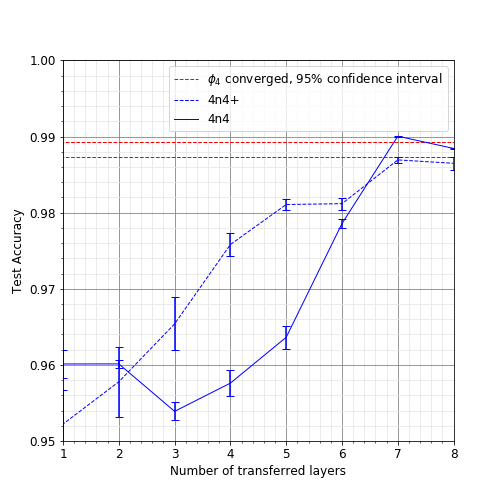

accuracy [0.94657767 0.95222188 0.95777963 0.96538911 0.97581672 0.981072
 0.98118554 0.98693603 0.98648736]
error [0.00424398 0.00445423 0.00458308 0.00346747 0.00154388 0.0007037
 0.00077237 0.00040501 0.0008762 ]
accuracy [0.94835361 0.96012152 0.96013244 0.95389423 0.95760733 0.96362621
 0.9785768  0.99005122 0.98844253]
error [4.08050626e-03 1.82407926e-03 4.99781941e-04 1.16521602e-03
 1.66055579e-03 1.50018641e-03 6.05241876e-04 7.44179911e-05
 6.77340717e-05]


In [24]:
### prepare plot (has to be in same cell as the plot functions)
fig = plt.figure(figsize=(xSize,ySize))
ax = fig.add_subplot(111)

# comparison with 4n4 source net accuracy 
plotCompare(acc107net+0.001, label = '$\phi_4$ converged, 95% confidence interval', style = '--', color = '#ff0000', linewidth = linewidth)
plotCompare(acc107net-0.001, label = '', style = '--', color = '#ff0000', linewidth = linewidth)
# 4n4 and 4n4p 10ep 5av
plotIt(run006)

    

# Calc confidence interval

In [6]:
### MOVED TO ARENA.PY
def calcStats(measurements):
    μ = np.mean(measurements)
    σ = np.std(measurements, ddof=1)
    max = np.max(measurements)
    min = np.min(measurements)
    print('max-min', max-min)
    print('σ',σ*100)
    n = len(measurements)
    ste = σ/np.sqrt(n-1)
    error = 1.96 * ste
    print('error',error*100)
    print()
    return [μ, error] 
    
def convertFullToMeanError(allResults):
    return np.array([calcStats(m) for m in allResults])

## Calculate some shit... not sure what, probably transfer learning comparision

In [7]:
from3 = [0.977
,0.98
,0.978
,0.977
,0.976
]
rnd = [    0.982,
    0.984,
    0.985,
    0.983,
    0.982]
print(rnd)


[0.982, 0.984, 0.985, 0.983, 0.982]


In [8]:
rndStats = calcStats(rnd)
from3Stats = calcStats(from3)

max-min 0.0030000000000000027
σ 0.13038404810405307
error 0.12777636714197202

max-min 0.0040000000000000036
σ 0.15165750888103116
error 0.14862435870341054



In [9]:
print(rndStats)
print(from3Stats)
print()

print(rndStats[0] + rndStats[1])
print(rndStats[0] - rndStats[1])
print()
print(from3Stats[0] + from3Stats[1])
print(from3Stats[0] - from3Stats[1])

[0.9832000000000001, 0.0012777636714197203]
[0.9776, 0.0014862435870341053]

0.9844777636714198
0.9819222363285803

0.9790862435870341
0.9761137564129659


## Calculating accuracty of phi_4 
### after 10 epochs, taken from logs 773-861, approximately (Adam skipped)


In [29]:
phi_4 = [
    0.9673,
    0.9676,
    0.9659,
    0.9680,
    0.9694,
    0.9724,
    0.9695,
    0.9694
]
phi_4_Stats = calcStats(phi_4)
print(phi_4_Stats)

max-min 0.006500000000000061
σ 0.19569929556775342
error 0.14497606699038412

[0.9686875, 0.0014497606699038412]


# Plot tensorboard in Matplotlib example code

In [29]:
#this doesn't work
import numpy as np
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
# from tensorflow.python.summary.event_accumulator import EventAccumulator

import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_tensorflow_log(path):

    # Loading too much data is slow...
    tf_size_guidance = {
        'compressedHistograms': 10,
        'images': 0,
        'scalars': 100,
        'histograms': 1
    }

    event_acc = EventAccumulator(path, tf_size_guidance)
    event_acc.Reload()

    # Show all tags in the log file
    #print(event_acc.Tags())

    training_accuracies =   event_acc.Scalars('training-accuracy')
    validation_accuracies = event_acc.Scalars('validation_accuracy')

    steps = 10
    x = np.arange(steps)
    y = np.zeros([steps, 2])

    for i in xrange(steps):
        y[i, 0] = training_accuracies[i][2] # value
        y[i, 1] = validation_accuracies[i][2]

    plt.plot(x, y[:,0], label='training accuracy')
    plt.plot(x, y[:,1], label='validation accuracy')

    plt.xlabel("Steps")
    plt.ylabel("Accuracy")
    plt.title("Training Progress")
    plt.legend(loc='upper right', frameon=True)
    plt.show()


if __name__ == '__main__':
    log_file = "/Users/frimann/Dropbox/2018_sumar_Tolvunarfraedi_HR/Transfer-Learning-MS/MS verkefni/Code/Endnet/mainCode/logsArchiveGood/052-4pc-RND-184KPM-Training 4pc with transfer from 3pc, on 7 CNN layers/events.out.tfevents.1548120196.polaris"
#     log_file = "./logs/events.out.tfevents.1456909092.DTA16004"
    plot_tensorflow_log(log_file)

KeyError: 'Key training-accuracy was not found in Reservoir'

In [31]:
# this works, use loadTensorboardLog to load a tensorboard log file and retun a dictionary with training results
from tensorboard.backend.event_processing import event_accumulator
import numpy as np

def loadTensorboardLog(path):
  event_acc = event_accumulator.EventAccumulator(path)
  event_acc.Reload()
  data = {}

  for tag in sorted(event_acc.Tags()["scalars"]):
    x, y = [], []

    for scalar_event in event_acc.Scalars(tag):
      x.append(scalar_event.step)
      y.append(scalar_event.value)

    data[tag] = (np.asarray(x), np.asarray(y))
  return data

# print(_load_run("/Users/frimann/Dropbox/2018_sumar_Tolvunarfraedi_HR/Transfer-Learning-MS/MS verkefni/Code/Endnet/mainCode/logsArchiveGood/052-4pc-RND-184KPM-Training 4pc with transfer from 3pc, on 7 CNN layers/events.out.tfevents.1548120196.polaris"))

{'acc': (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178

# Converge 3 to 4 
## 5 average
## train 3 every time
### Calculate means and shit

In [ ]:
d3 = load_obj('.','d3')
d4 = load_obj('.','d4')
print('33333333333333')
for key, value in d3.items():
    print(key,value)
print()
print('4444444444444')
for key, value in d4.items():
    print(key,value)
print('\naverage....')
print('33333333333333')
for key, value in d3.items():
    print(key,np.mean(value))
print()
print('4444444444444')
for key, value in d4.items():
    print(key,np.mean(value))
    

In [ ]:
accRNDto4 = [0.996, 0.9961, 0.9958, 0.9951, 0.994]
acc3to4 = [0.9779, 0.9702, 0.9717, 0.9749, 0.9657]

print(calcStats(accRNDto4))
print(calcStats(acc3to4))